In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = sns.load_dataset("penguins")
df.head()
df.shape
df.info


<bound method DataFrame.info of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1

In [32]:
# View Data
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


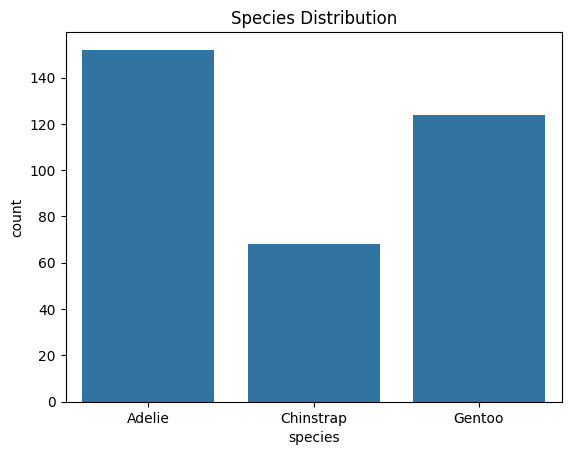

In [33]:
# Univariate Analysis
# Speices Count
sns.countplot(x="species", data=df)
plt.title("Species Distribution")
plt.show()


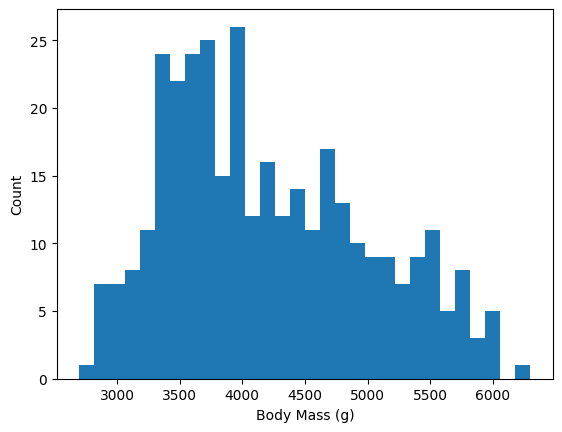

In [34]:
# Body Mass Distribution
plt.hist(df["body_mass_g"], bins=30)
plt.xlabel("Body Mass (g)")
plt.ylabel("Count")
plt.show()


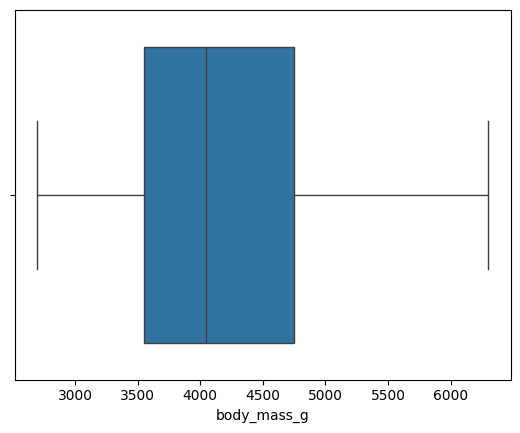

In [35]:
# Boxplot for Body Mass
sns.boxplot(x=df["body_mass_g"])
plt.show()


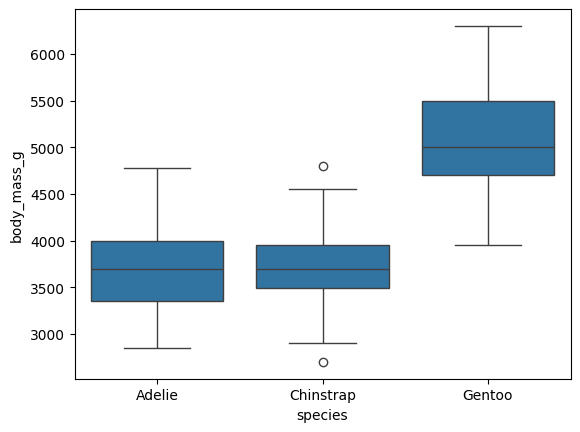

In [36]:
# Bivariate Analysis
# Species vs Body Mass
sns.boxplot(x="species", y="body_mass_g", data=df)
plt.show()

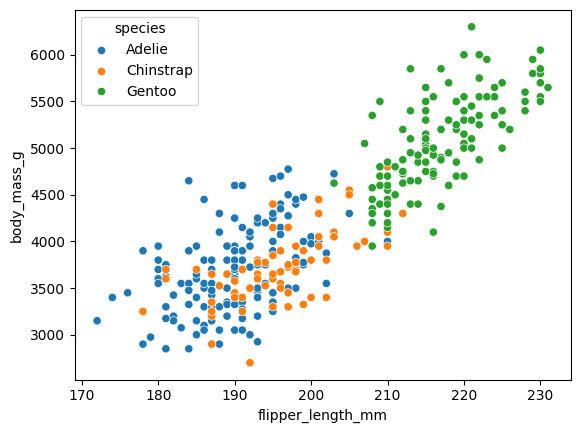

In [37]:
# Multivariate Analysis
# Flipper Length vs Body Mass
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=df)
plt.show()

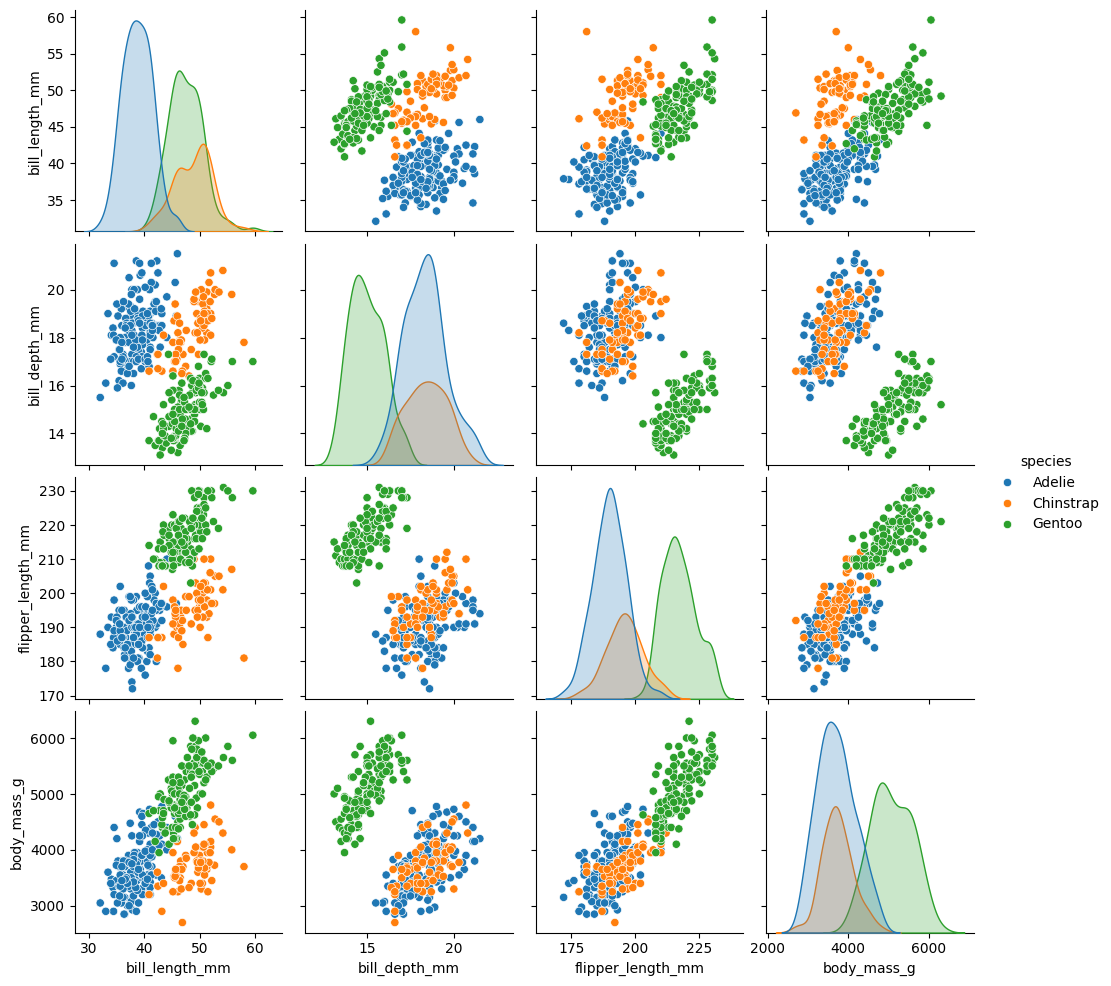

In [38]:
sns.pairplot(df, hue="species")
plt.show()

In [39]:
# Handle Missing Data
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [40]:
df.fillna(
    {"bill_length_mm": df["bill_length_mm"].median()},
    inplace=True
)
df.fillna(
    {"bill_depth_mm": df["bill_depth_mm"].median()},
    inplace=True
)
df.fillna(
    {"flipper_length_mm": df["flipper_length_mm"].median()},
    inplace=True
)




,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,44.45,17.3,197.0,NaN,NaN
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,NaN,NaN
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,Female


In [41]:
df.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           2
sex                  11
dtype: int64

In [42]:
# Detect & Treat Outliers
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,44.45,17.3,197.0,NaN,NaN
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,NaN,NaN
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,Female


In [43]:
Q1 = df["body_mass_g"].quantile(0.25)
Q3 = df["body_mass_g"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df["body_mass_g"] = np.clip(df["body_mass_g"], lower, upper)

In [44]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,44.45,17.3,197.0,NaN,NaN
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,NaN,NaN
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,Female


In [45]:
# Cleaning Data
df.drop_duplicates(inplace=True)

In [46]:
# Featured Engineering
df["body_mass_kg"] = df["body_mass_g"] / 1000
df["bill_ratio"] = df["bill_length_mm"] / df["bill_depth_mm"]


In [47]:
# Encoding categorical features
df = pd.get_dummies(df, columns=["species","island","sex"], drop_first=True)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_mass_kg,bill_ratio,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.10,18.7,181.0,3750.0,3.75,2.090909,False,False,False,True,True
1,39.50,17.4,186.0,3800.0,3.80,2.270115,False,False,False,True,False
2,40.30,18.0,195.0,3250.0,3.25,2.238889,False,False,False,True,False
3,44.45,17.3,197.0,NaN,NaN,2.569364,False,False,False,True,False
4,36.70,19.3,193.0,3450.0,3.45,1.901554,False,False,False,True,False


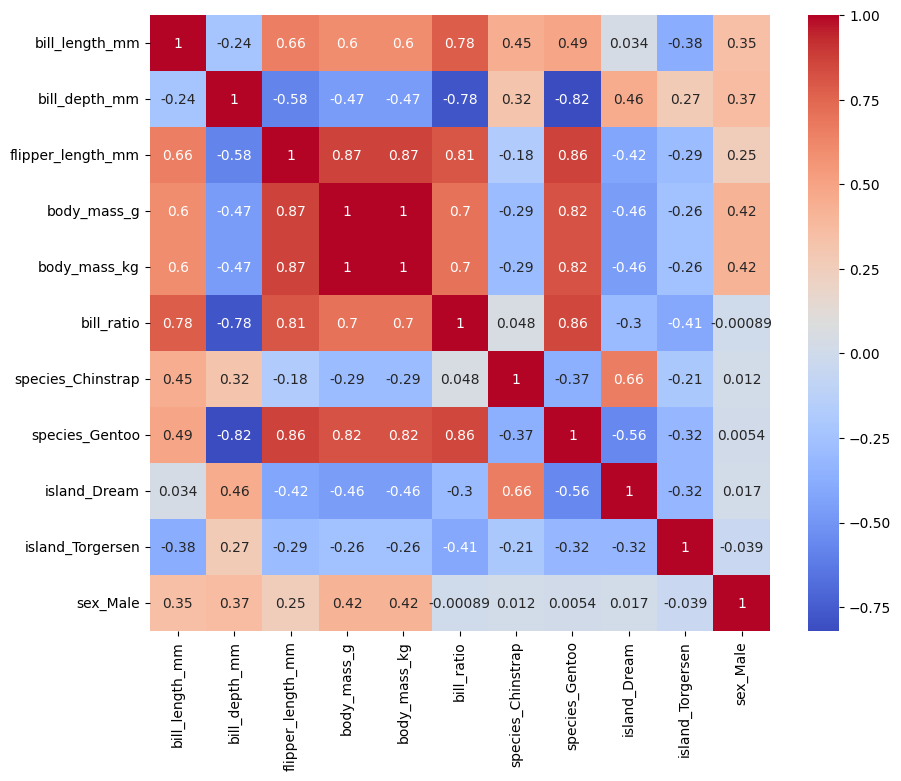

In [48]:
# Correlation analysis
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()
